# Deutsch's Algorithm

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# Loading your IBM Q account(s)
from math import pi
IBMQ.load_accounts()

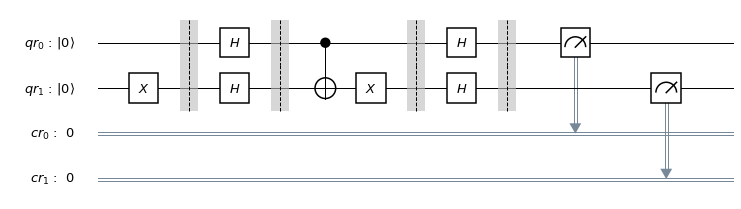

In [2]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')
qr = QuantumRegister(2, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(2, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="Deutsch_Algorithm")     

### Ancilla q[1] starts with |1>
qc.x(qr[1])
qc.barrier()

## Superposition
qc.h(qr)
qc.barrier()

#### Oracle Function  f(x) = not (x) 
qc.cx(qr[0],qr[1])
qc.x(qr[1])
qc.barrier()

#### Change the bases 
qc.h(qr)
qc.barrier()

# To measure the whole quantum register
qc.measure(qr, cr)
circuit_drawer(qc,output='mpl') 

{'11': 8000}


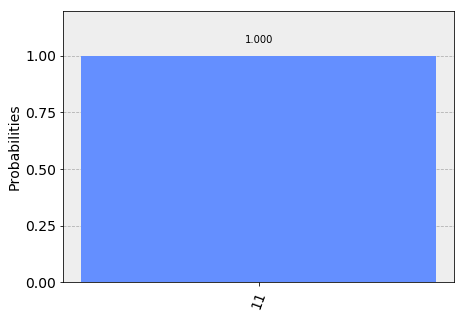

In [3]:
job = execute(qc, backend=backend, shots=8000,)
result = job.result()

    
print(result.get_counts(qc))
plot_histogram(result.get_counts())

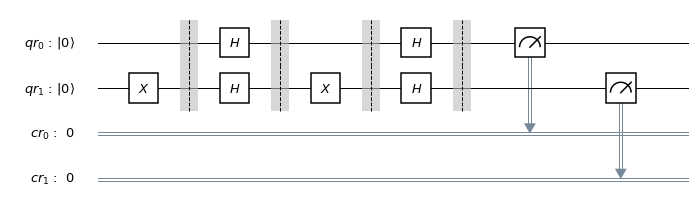

In [4]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')
qr = QuantumRegister(2, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(2, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="Deutsch_Algorithm")   

# Ancilla Q[1]
qc.x(qr[1])
qc.barrier()

## Superposition
qc.h(qr[0])
qc.h(qr[1])
qc.barrier()

#### Oracle Function  f(x) = x  
#qc.cx(qr[0],qr[1])
#qc.x(qr[1])
#qc.barrier()

#### Oracle Function  f(x) = 1  
qc.x(qr[1])
qc.barrier()

#### Change the bases 
qc.h(qr[0])
qc.h(qr[1])
qc.barrier()

# To measure the whole quantum register
qc.measure(qr, cr)
circuit_drawer(qc,output='mpl') 

{'10': 8000}


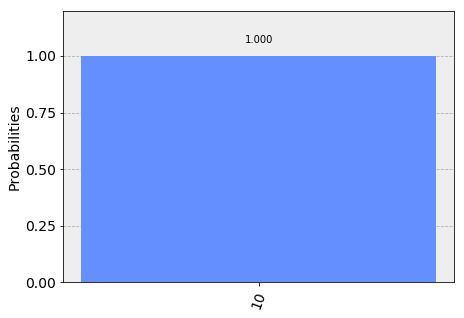

In [5]:
job = execute(qc, backend=backend, shots=8000,)
result = job.result()

    
print(result.get_counts(qc))
plot_histogram(result.get_counts())